<a href="https://colab.research.google.com/github/Ashi743/pytorch/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data prep, --> build --> fit --> pred --> eval --> save



In [120]:
import torch
from torch  import nn
# to combine nn to get something
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

torch.__version__

'2.5.0+cu121'

In [122]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1) #giving a dim
y = weight * X + bias

In [123]:
X.shape, y.shape


(torch.Size([50, 1]), torch.Size([50, 1]))

In [124]:
len(X)

50

In [125]:
#splitting
train_split = int(0.8 * len(X))
val_split = int(0.9 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_val, y_val = X[train_split:val_split], y[train_split:val_split]
X_test, y_test = X[val_split:], y[val_split:]

In [126]:
X_train.shape, X_test.shape, y_train.shape

(torch.Size([40, 1]), torch.Size([5, 1]), torch.Size([40, 1]))

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [127]:
import matplotlib.pyplot as plt

def plot_predictions(train_data= X_train,
                     train_labels= y_train,
                     test_data= X_test,
                     test_labels= y_test,
                     predictions=None):
    """
    Plots training data, test data, and compares predictions if available.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Plot predictions in red if provided
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Add legend and show plot
    plt.legend(prop={"size": 14})
    plt.xlabel("Data")
    plt.ylabel("Labels")
    plt.title("Train, Test, and Predicted Data")
    plt.show();


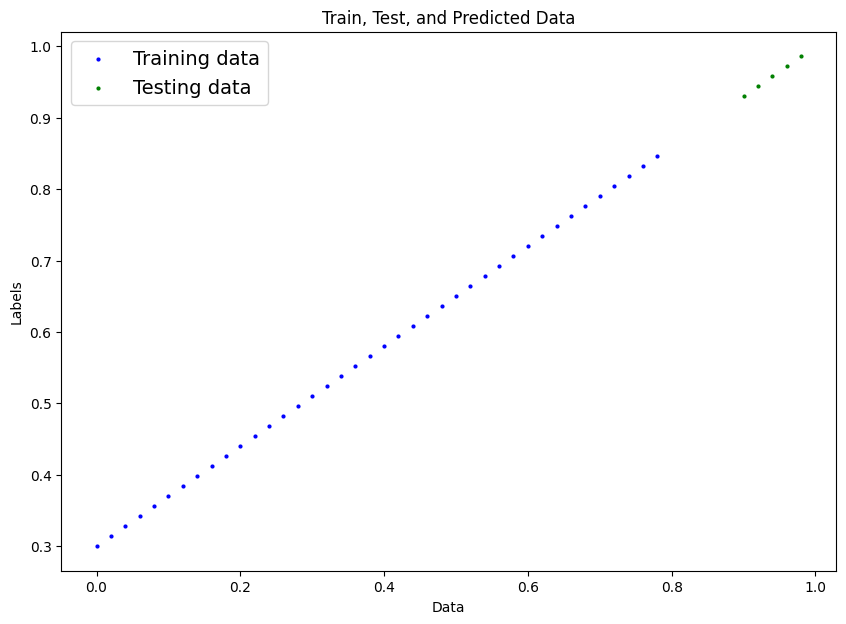

In [128]:
plot_predictions();


In [129]:
#gradient descent
#back propogation
from torch import nn
#pytorch model
class linear_regression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True,
                                            dtype= torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True,
                                         dtype=torch.float))

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias




In [130]:

torch.manual_seed(42)
model_0= linear_regression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [131]:
weights= 0.7
bias= 0.3
#List named parameters
model_0.state_dict()
print(f"to make {model_0.state_dict()} look {weights}  and  {bias}")

to make OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]) look 0.7  and  0.3


In [110]:
torch.rand(1)

tensor([0.3904])

In [132]:
#ideal model for
X_test, y_test

(tensor([[0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [133]:
#making predictions using torch.inference.mode()
with torch.inference_mode():
  y_preds= model_0(X_test)       #NO TRACK OF GRADIENT

y_preds

tensor([[0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [113]:
'''with torch.no_grad():
  y_preds= model_0(X_test)
y_preds'''

'with torch.no_grad():\n  y_preds= model_0(X_test)\ny_preds'

In [114]:
'''y_preds= model_0(X_test)
y_preds'''

'y_preds= model_0(X_test)\ny_preds'

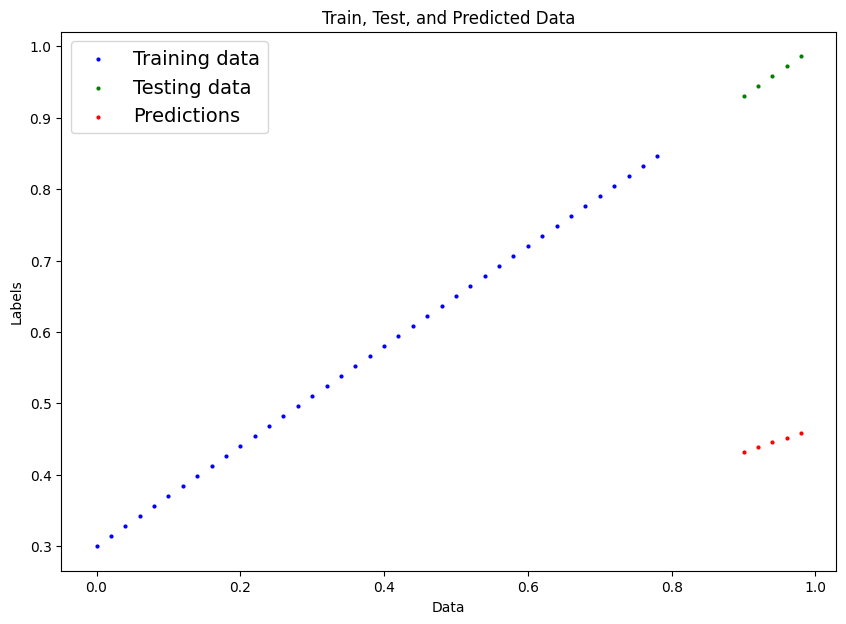

In [134]:
plot_predictions(predictions= y_preds)

In [116]:
#intuition
#to move from *unknown* param to *known* param  by  use of loss fuctions

things we need to train:

loss function

optimizer: to adjust model's parameter to improve loss

a training loop and testing loop for PYTORCH


#a training loop
# loop via forward prop -> loss( compare forward pred with loss) -> optimizer -> loss backward -> optimizer


In [136]:
import torch
import torch.nn as nn

# Define loss function
loss_fn = nn.L1Loss()

# Define optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)


torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
        # 1. Forward pass on test data
        test_pred = model_0(X_test)

        # 2. Calculate loss on test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float))  # Ensure y_test is float

        # Print out progress every 10 epochs
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.item())  # Convert to scalar
            test_loss_values.append(test_loss.item())  # Convert to scalar
            print(f"Epoch: {epoch} | MAE Train Loss: {loss.item()} | MAE Test Loss: {test_loss.item()}")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.49903565645217896
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3623756766319275
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.2313755750656128
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.15708117187023163
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.12486903369426727
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.10950896888971329
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.09828630834817886
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.08915574848651886
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.08002521097660065
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.07159203290939331


which loss fnc or optim?
reg-> nn.L1Loss, clas-> torch.optim.SGD()

dogvscat -> nn.BCELoss()

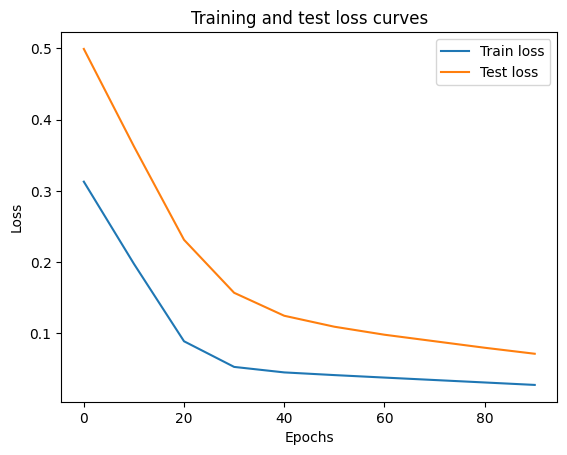

In [137]:
#plot loss curves
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

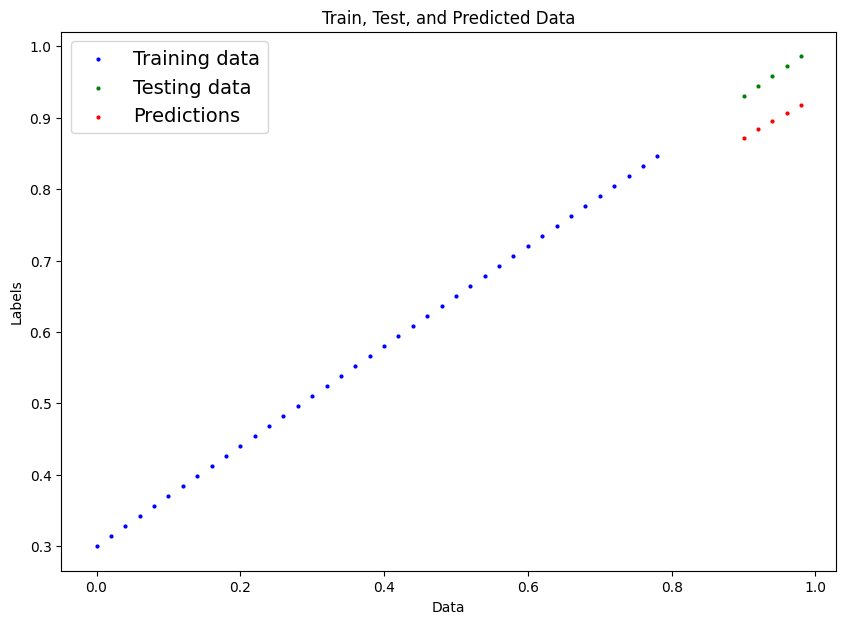

In [139]:
list(model_0.state_dict().items() )
plot_predictions(predictions=test_pred)


Saving the code

three methods  

1). torch.save()  in pkl format

2). torch.load()  load the saved proj

3). torch.nn.Module.load_state_dict()    load saved state dict



In [140]:
#saving the code
model_0

linear_regression()

In [142]:
from os.path import exists
#save
from pathlib import Path

# create model directory
MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents =True ,exist_ok =True)

#model save path
MODEL_NAME= "01_pytorch_workflow.pth"
MODEL_SAVE_PATH= MODEL_PATH/MODEL_NAME

#save model_dict
print(f"Saving model to :{MODEL_SAVE_PATH}")
torch.save(obj= model_0.state_dict(),
           f= MODEL_SAVE_PATH) #F= FILE PATH

Saving model to :models/01_pytorch_workflow.pth


In [149]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1568 Nov  5 11:34 01_pytorch_workflow.pth


**#to load saved file**

since we saved state_dict()  we'll create new instance of our model class and load saved model_dict() into that.

In [150]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [151]:
loaded_model_0= linear_regression()

#to upload new instance with updated params
loaded_model_0.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

<ipython-input-151-59acfaf05f0b>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f= MODEL_SAVE_PATH))


<All keys matched successfully>

In [153]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [154]:
#to make some predictions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_pred=  loaded_model_0(X_test)

loaded_model_pred


tensor([[0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [158]:
# to compare loaded vs model
test_preds== loaded_model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True]])

PUTTING ALL TOGETHER

1). data


In [60]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.5.0+cu121'

In [61]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"using device: {device}")

using device: cuda


In [62]:
#data
w= 0.7
b= 0.3
start= 0
step= 0.2
end= 10

X= torch.arange(start ,end, step).unsqueeze(dim= 1)
y= w*X + b

In [63]:
#train test split
train_split= int(0.8*len(X))
X_train, y_train = X[:train_split] ,y[:train_split]
X_test ,y_test= X[train_split:] ,y[train_split:]

In [64]:
def plot_predictions(x_data= X_train,
                     x_label= y_train,
                     y_data= X_test,
                     y_label= y_test,
                     prediction =None):
  plt.figure(figsize= (10,8))
  plt.scatter(x_data, x_label, c= 'r' ,s=6, label= "training set")
  plt.scatter(y_data, y_label ,c='g', s=6, label ="testing set")
  if prediction is not None:
    plt.scatter(y_data, prediction ,c='y', s=6 ,label="predicted value")

  plt.legend()
  plt.xlabel('data')
  plt.ylabel("labels")
  plt.title("train ,test, predicted")
  plt.show()

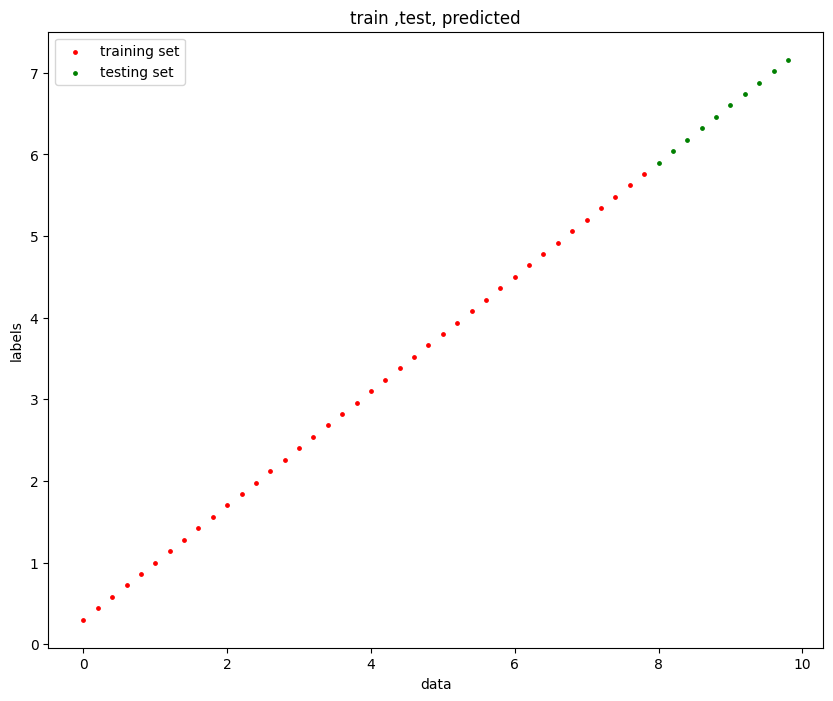

In [65]:
plot_predictions()

In [66]:
#use of predefined models
#ALWAYS HAVE TO MAKE MODELS AND LAYERING AS OPPOSED TO TF where it was kinda direct
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_model= nn.Linear(in_features= 1, out_features=1)

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.linear_model(x)

In [67]:
# a random manual seed for initialization
torch.manual_seed(40)
# modelling
model= LinearRegression()
model, model.state_dict()

(LinearRegression(
   (linear_model): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_model.weight', tensor([[-0.2642]])),
              ('linear_model.bias', tensor([0.7322]))]))

In [68]:
#current device
next(model.parameters()).device

device(type='cpu')

In [69]:
#change to GPU
model.to(device)
next(model.parameters()).device

device(type='cuda', index=0)

Forward pass - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).

Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).

Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).

Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).

Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).


In [76]:

#model training
torch.manual_seed(40)


model.to(device)
X_train = X_train.to(device)
X_test  = X_test.to(device)
y_train = y_train.to(device)
y_test  = y_test.to(device)

#loss function
loss_fn= nn.L1Loss()
#optimization
optimizer= torch.optim.SGD(params= model.parameters(),
                           lr= 0.01)

epochs= 100
train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):
  #training
  model.train()                                 #.modelling TURN ON (BY DEFAULT)
  #forward pass the training set
  train_pred= model(X_train)                        #.fit(xtrain)
  #loss
  loss= loss_fn(train_pred, y_train)                # wrt yTRAIN
  #zero gradient optim
  optimizer.zero_grad()                         # zero grad --> backprop -> up gradient
  #loss backward
  loss.backward()
  #gradient descent
  optimizer.step()

  #testing
  model.eval()
  #forward pass testing set
  with torch.inference_mode():
    test_pred= model(X_test)                                          # predict(X_test)
    test_loss= loss_fn(test_pred ,y_test )          # wrt yTEST

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.cpu().item())  # Move to CPU and detach
    test_loss_values.append(test_loss.cpu().item())  # Move to CPU and detach
    print(f"Epoch: {epoch} | Train Loss: {loss.cpu().item()} | Test Loss: {test_loss.cpu().item()}")



#models learnt model
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {w}, bias: {b}")

Epoch: 0 | Train Loss: 0.1435137838125229 | Test Loss: 0.009700155816972256
Epoch: 10 | Train Loss: 0.14995788037776947 | Test Loss: 0.0011265277862548828
Epoch: 20 | Train Loss: 0.12554912269115448 | Test Loss: 0.06033382564783096
Epoch: 30 | Train Loss: 0.12876813113689423 | Test Loss: 0.05783386155962944
Epoch: 40 | Train Loss: 0.13114312291145325 | Test Loss: 0.055333852767944336
Epoch: 50 | Train Loss: 0.1330578625202179 | Test Loss: 0.053833868354558945
Epoch: 60 | Train Loss: 0.1330578625202179 | Test Loss: 0.053833868354558945
Epoch: 70 | Train Loss: 0.1330578625202179 | Test Loss: 0.053833868354558945
Epoch: 80 | Train Loss: 0.1330578625202179 | Test Loss: 0.053833868354558945
Epoch: 90 | Train Loss: 0.1330578625202179 | Test Loss: 0.053833868354558945
The model learned the following values for weights and bias:
OrderedDict([('linear_model.weight', tensor([[0.6660]], device='cuda:0')),
             ('linear_model.bias', tensor([0.2997], device='cuda:0'))])

And the original va

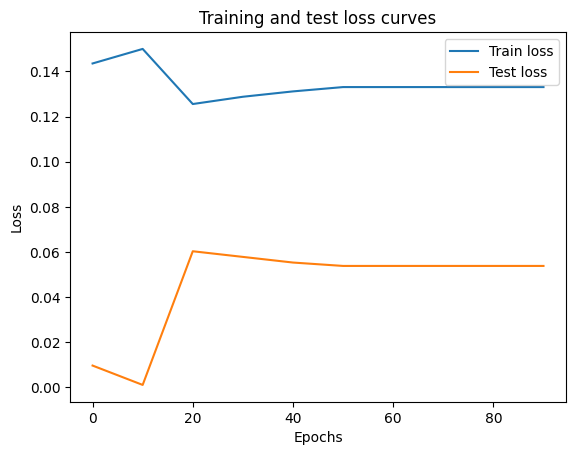

In [77]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

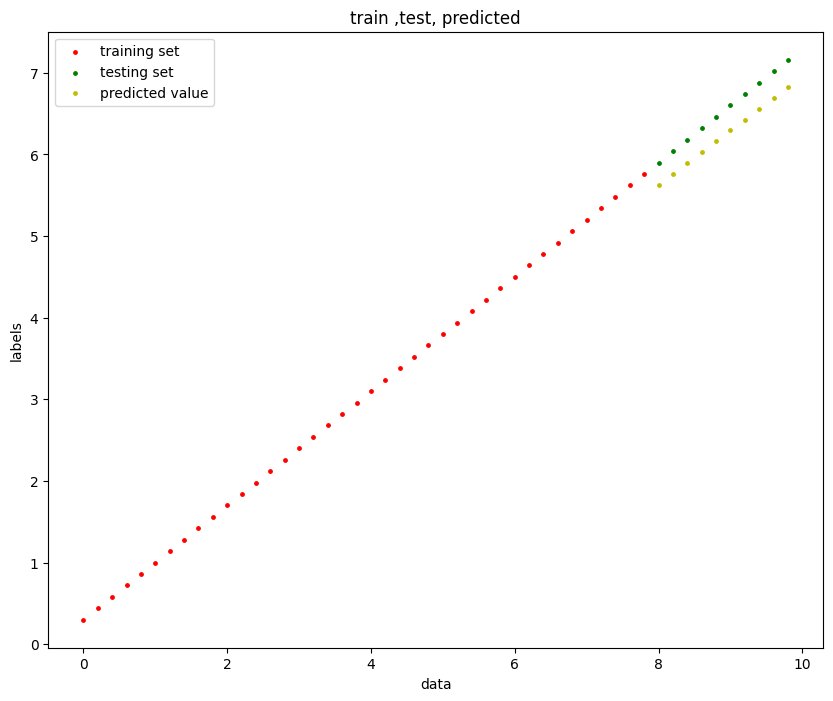

In [78]:
plot_predictions(prediction= test_pred.cpu())     #tensor to cpu

In [52]:
#saving
from pathlib import Path
#model directory
MODEL_PATH= Path("modelsss")
MODEL_PATH.mkdir(parents= True ,exist_ok= True)
#model path
MODEL_NAME="WORKFLOW_ 1 "
MODEL_SAVE_PATH= MODEL_PATH/MODEL_NAME
#save model dict
print(f"saving to {MODEL_SAVE_PATH} ")
torch.save(obj= model.state_dict(),
           f= MODEL_SAVE_PATH)

saving to modelsss/WORKFLOW_ 1  
